# House Price Prediction Competition

## Abstract

First competition with fellow DSS member.
The goal is to predict the home price. 

The best technique I want to use are:

* Random Forest Regressor
* Gradient boosting
* Emsemble Learning
* Support Vector Regression

## Initialize

In [35]:
### Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

# Read the dataset

In [36]:
df = pd.read_csv('Data/train.csv', index_col=0)

# Viewing the data

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Determine Which Values To Actually Look At

In [ ]:
for i in range(0, 15):
    cat = df.columns[i]
    print(cat)
    sns.catplot(x=cat, y="SalePrice", data=df)
    
    
for i in range(15, 30):
    cat = df.columns[i]
    print(cat)
    sns.catplot(x=cat, y="SalePrice", data=df)
    
    
for i in range(30, 45):
    cat = df.columns[i]
    print(cat)
    sns.catplot(x=cat, y="SalePrice", data=df)
    
    
for i in range(45, 60):
    cat = df.columns[i]
    print(cat)
    sns.catplot(x=cat, y="SalePrice", data=df)
    
    
for i in range(60, 80):
    cat = df.columns[i]
    print(cat)
    sns.catplot(x=cat, y="SalePrice", data=df)

# Determining Which Columns Have Some Sort Of Liniarity To Them - Visual

In [ ]:
MasVnrArea
BsmtFinSF1
2ndFlrSF

In [37]:
values = [
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'LotArea',
'MSSubClass',
'MSZoning',
'Neighborhood',
'MasVnrArea',
'ExterQual',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtFinSF1',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'GrLivArea',
'FullBath',
'KitchenQual',
'TotRmsAbvGrd',
'Fireplaces',
'GarageYrBlt',
'GarageCars',
'GarageArea',
    
    
'SalePrice',
]


# Find any missing values
for col in values:
    
    print((col, df[col].isnull().sum()))
    
    
# Viewing Only Important
for i in range(0, 80):
    cat = df.columns[i]
    if cat in values:
        print(cat)
        if False:
            sns.catplot(x=cat, y="SalePrice", data=df)
        
        
for value in df.columns:
    if value not in values:
        df.pop(value)
        
df_og = df.copy()

('OverallQual', 0)
('OverallCond', 0)
('YearBuilt', 0)
('YearRemodAdd', 0)
('LotArea', 0)
('MSSubClass', 0)
('MSZoning', 0)
('Neighborhood', 0)
('MasVnrArea', 8)
('ExterQual', 0)
('Foundation', 0)
('BsmtQual', 37)
('BsmtCond', 37)
('BsmtFinSF1', 0)
('TotalBsmtSF', 0)
('1stFlrSF', 0)
('2ndFlrSF', 0)
('GrLivArea', 0)
('FullBath', 0)
('KitchenQual', 0)
('TotRmsAbvGrd', 0)
('Fireplaces', 0)
('GarageYrBlt', 81)
('GarageCars', 0)
('GarageArea', 0)
('SalePrice', 0)
MSSubClass
MSZoning
LotArea
Neighborhood
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtFinSF1
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
FullBath
KitchenQual
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
SalePrice


In [5]:
df.head()

,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,CollgCr,7,5,2003,2003,196.0,Gd,...,854,1710,2,Gd,8,0,2003.0,2,548,208500
2,20,RL,9600,Veenker,6,8,1976,1976,0.0,TA,...,0,1262,2,TA,6,1,1976.0,2,460,181500
3,60,RL,11250,CollgCr,7,5,2001,2002,162.0,Gd,...,866,1786,2,Gd,6,1,2001.0,2,608,223500
4,70,RL,9550,Crawfor,7,5,1915,1970,0.0,TA,...,756,1717,1,Gd,7,1,1998.0,3,642,140000
5,60,RL,14260,NoRidge,8,5,2000,2000,350.0,Gd,...,1053,2198,2,Gd,9,1,2000.0,3,836,250000


# Creating A Function That Will Reorder each column based upon the average SalePrice For That Column

In [4]:
master_df_change_dict = {}

In [38]:
def find_order_dict(data_frame, category):

    # Find the unique values in the column
    cat_values = data_frame[cat].unique()
    # Create a dictionary to story entries to
    store_array = {}

    # For each unique value
    for value in cat_values:

        # Obtain all column associated with that value
        out_df = data_frame.loc[data_frame[cat] == value]

        # Make the mean sale price for that category
        store_array[value] = float(np.mean(out_df['SalePrice']))
        
        try:
            if np.isnan(value):
                if np.isnan(store_array[value]):
                    store_array[value] = 0
                    
        except Exception as ex:
            print(ex)


    #print(store_array.items())
    
    import operator
    #d = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
    #print('Original dictionary : ',d)
    new_dict = dict(sorted(store_array.items(), key=operator.itemgetter(1)))
    #print(new_dict)
    # Reorder this newly formed dictionary based upon the average sale price
    #new_dict = {k: v for k, v in sorted(store_array.items(), key=lambda item: item[1])}


    #for iii, it in enumerate(new_dict):
    #    print((new_dict[it], iii))
        
    # Rather than haveing the average sale price for the value - set it to some integer value
    for new_dic_idx, item in enumerate(new_dict):
        new_dict[item] = new_dic_idx

    return new_dict


def concatonate_dict_entry(the_dict, con_cat_array=[[0, 1, 2 ],], high_low_array=['low', 'high' ]):
    
    for ids, ar in enumerate(con_cat_array):
        start = ar[0]
        end = ar[-1] + 1
        print((start, end))
        con_cat_array[ids] = list(the_dict.keys())[start:end]
    
    
    
    
    
    for working_idx, array in enumerate(con_cat_array):
        if high_low_array[working_idx] == 'low':
            reorder_val = the_dict[array[0]]
        elif high_low_array[working_idx] == 'high':
            reorder_val = the_dict[array[-1]]

        for idx_value in array:
            the_dict[idx_value] = reorder_val




    store = []
    for col in the_dict:

        store.append(the_dict[col])

    arrr = np.hstack((store[1:], store[-1]))  
    subbs = np.subtract(store, arrr)

    new_store = []
    counter = 0
    for num in subbs:
        if num == 0:
            new_store.append(counter)

        else:
            new_store.append(counter)
            counter += 1


    for idxxx, valuesss in enumerate(the_dict):
        the_dict[valuesss] = new_store[idxxx]


    return the_dict
    

# Redefining The First Linear Value Found - OverallQual

OverallQual Correction


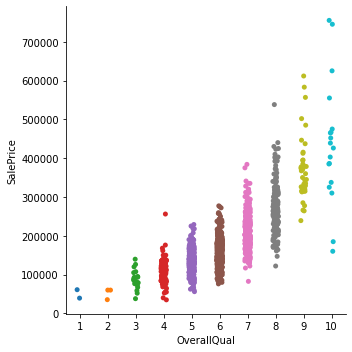

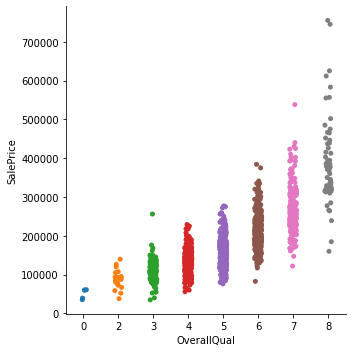

In [39]:
cat = values[0]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)

df['OverallQual'] = df.OverallQual.replace([1, 2], 0)
df['OverallQual'] = df.OverallQual.replace([3, ],2)
df['OverallQual'] = df.OverallQual.replace([4, ],3)
df['OverallQual'] = df.OverallQual.replace([5, ],4)
df['OverallQual'] = df.OverallQual.replace([6, ],5)
df['OverallQual'] = df.OverallQual.replace([7, ],6)
df['OverallQual'] = df.OverallQual.replace([8, ],7)
df['OverallQual'] = df.OverallQual.replace([9, 10 ],8)


sns.catplot(x=cat, y="SalePrice", data=df)


# Redefining The Second Linear Value Found - OverallCond

OverallCond Correction


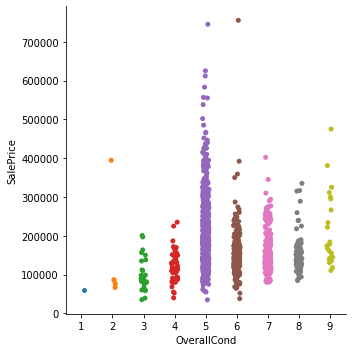

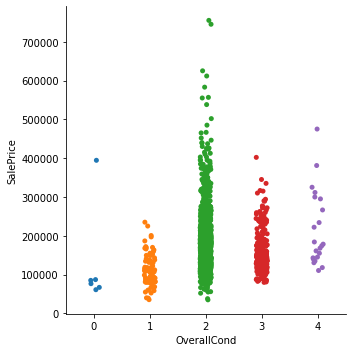

In [40]:
cat = values[1]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)

df['OverallCond'] = df.OverallCond.replace([1, 2], 0)
df['OverallCond'] = df.OverallCond.replace([3, 4 ],1)
df['OverallCond'] = df.OverallCond.replace([5, 6 ],2)
df['OverallCond'] = df.OverallCond.replace([7, 8 ],3)
df['OverallCond'] = df.OverallCond.replace([9,  ],4)


sns.catplot(x=cat, y="SalePrice", data=df)



# Redefining The 3rd Linear Value Found - YearBuilt

YearBuilt Correction


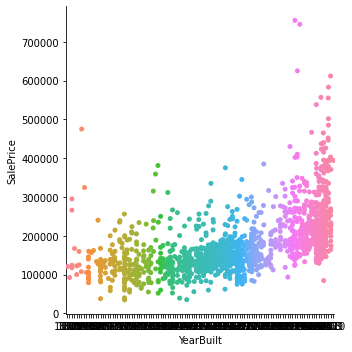

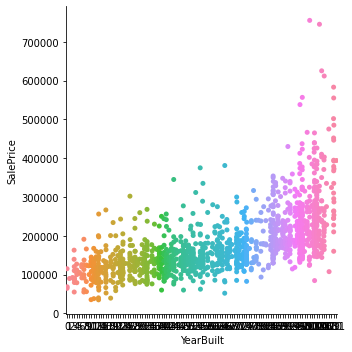

In [41]:
cat = values[2]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 4th Linear Value Found - YearRemodAdd

YearRemodAdd Correction


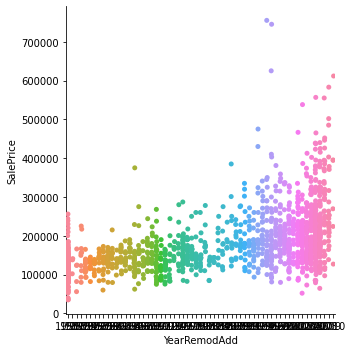

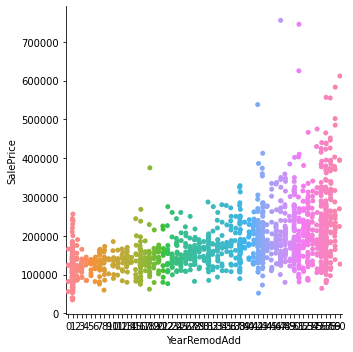

In [42]:
cat = values[3]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 5th Linear Value Found - LotArea

LotArea Correction


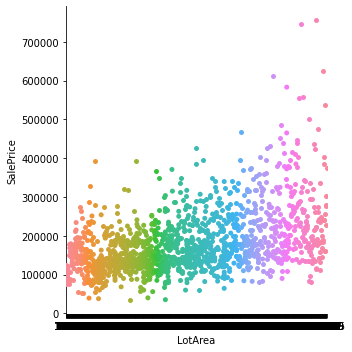

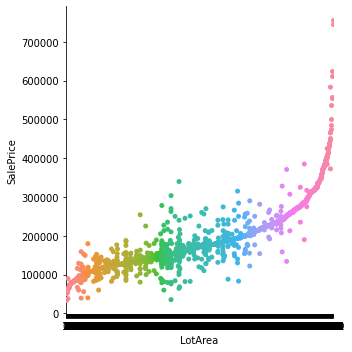

In [44]:
cat = values[4]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 6th Linear Value Found - MSSubClass

MSSubClass Correction


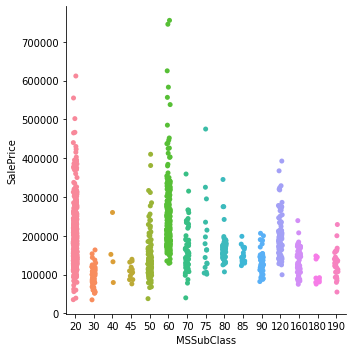

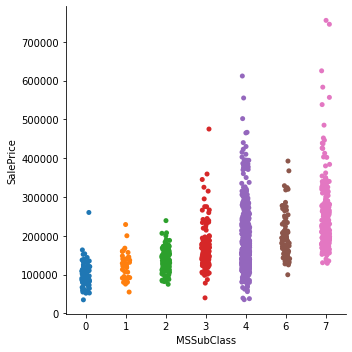

In [45]:
cat = values[5]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


df[cat] = df.MSSubClass.replace([30, 40, 45], 0)
df[cat] = df.MSSubClass.replace([180, 190 ],1)
df[cat] = df.MSSubClass.replace([90, 160 ],2)
df[cat] = df.MSSubClass.replace([70, 75, 80, 85 ],3)
df[cat] = df.MSSubClass.replace([20, 50 ],4)
df[cat] = df.MSSubClass.replace([50, ],5)
df[cat] = df.MSSubClass.replace([120, ],6)
df[cat] = df.MSSubClass.replace([60,],7)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 7th Linear Value Found - MSZoning

MSZoning Correction


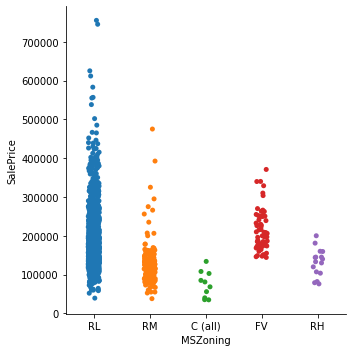

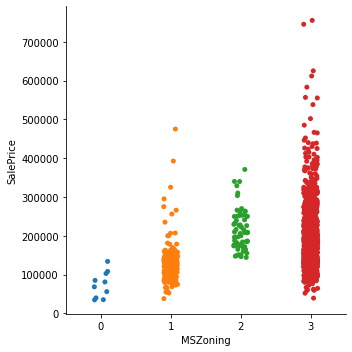

In [46]:
cat = values[6]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


if True:
    df[cat] = df.MSZoning.replace(['C (all)', ], 0)
    df[cat] = df.MSZoning.replace(['RH', 'RM' ], 1)
    df[cat] = df.MSZoning.replace(['FV', ], 2)
    df[cat] = df.MSZoning.replace(['RL', ], 3)



    sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 8th Linear Value Found - Neighborhood

Neighborhood Correction
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and

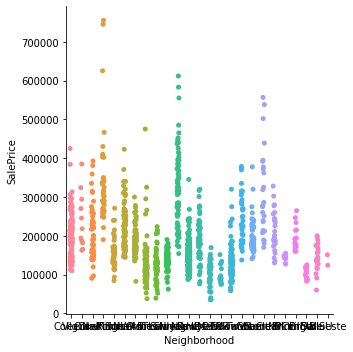

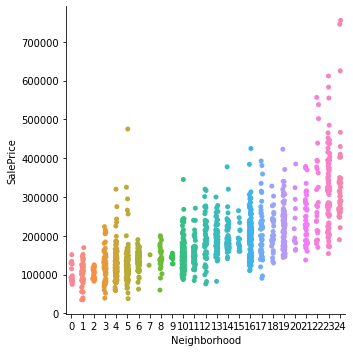

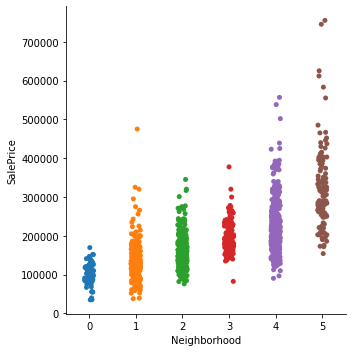

In [49]:
df2 = df_og.copy()

cat = values[7]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df2)


new_order_dic = find_order_dict(df2, cat)

df2[cat] = df2[cat].map(new_order_dic)

print(new_order_dic)

sns.catplot(x=cat, y="SalePrice", data=df2)

if True:
    
    new_order_dic2 = concatonate_dict_entry(new_order_dic, con_cat_array=[[0, 1, 2], 
                                                                          [3, 4, 5, 6, 7, 8, 9], 
                                                                          [10, 11, 12,], 
                                                                          [13, 14, 15], 
                                                                          [16, 17, 18, 19, 20, 21, 22], 
                                                                          [23, 24]], 
                                            high_low_array=['low', 'low', 'low', 'low', 'low', 'low'])
    
    print(new_order_dic2)
    df[cat] = df[cat].map(new_order_dic2)


    sns.catplot(x=cat, y="SalePrice", data=df)


# Redefining The 9th Linear Value Found - MassVnrArea

MasVnrArea Correction


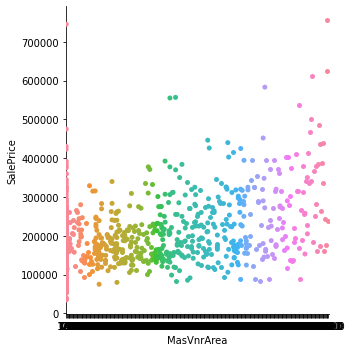

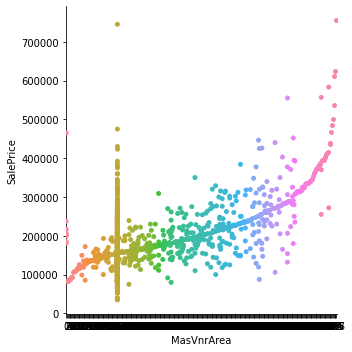

In [51]:
cat = values[8]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 10th Linear Value Found - ExterQual

ExterQual Correction
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


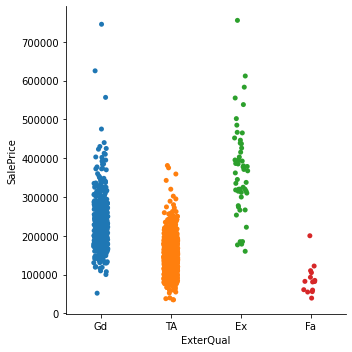

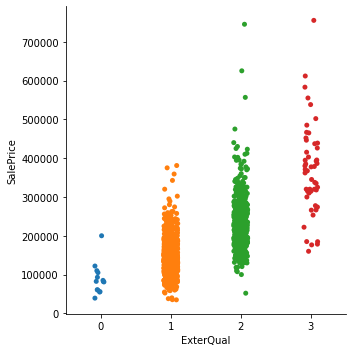

In [52]:
cat = values[9]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 11th Linear Value Found - Foundation Correction

Foundation Correction
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
(0, 2)
(2, 5)


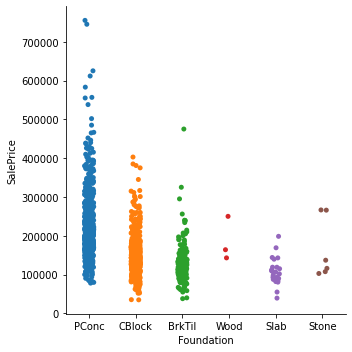

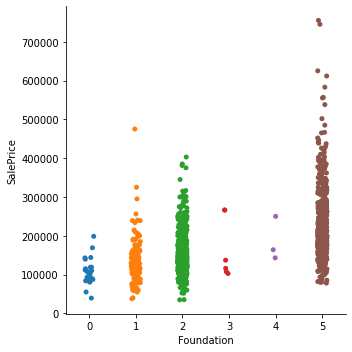

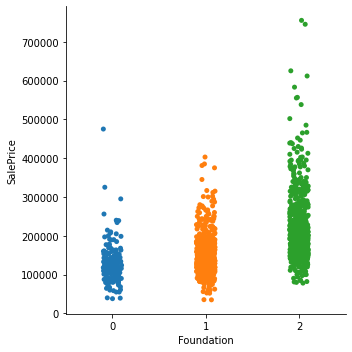

In [53]:
df2 = df_og.copy()
cat = values[10]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df2)


new_order_dic = find_order_dict(df2, cat)

df2[cat] = df2[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df2)


if True:
    new_order_dic2 = concatonate_dict_entry(new_order_dic, con_cat_array=[[0, 1], [2, 3, 4]], 
                                            high_low_array=['low', 'low'])
    
    df[cat] = df[cat].map(new_order_dic2)


    sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 12th Linear Value Found - BsmtQual

BsmtQual Correction
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
(0, 2)


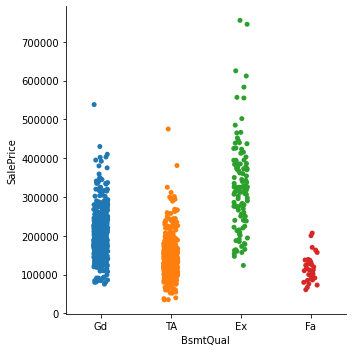

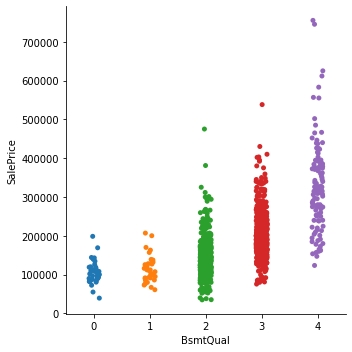

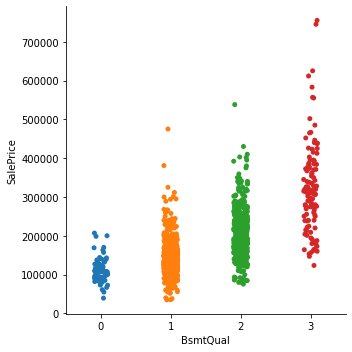

In [54]:
df2 = df_og.copy()

cat = values[11]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df2)


new_order_dic = find_order_dict(df2, cat)

df2[cat] = df2[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df2)


if True:
    new_order_dic2 = concatonate_dict_entry(new_order_dic, con_cat_array=[[0, 1], ], 
                                            high_low_array=['low', ])
    
    df[cat] = df[cat].map(new_order_dic2)


    sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 13th Linear Value Found - BsmtCond

BsmtCond Correction
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
(0, 3)


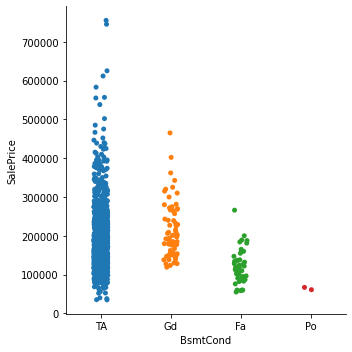

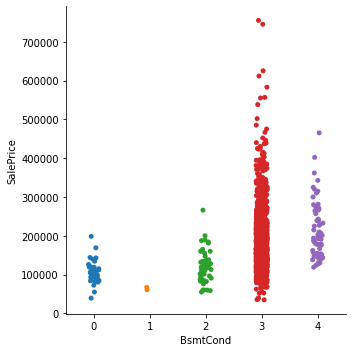

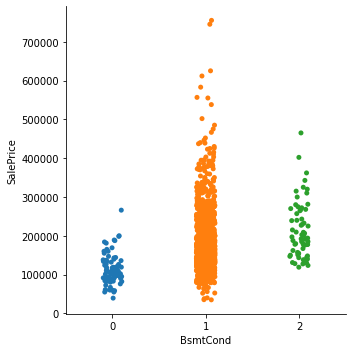

In [55]:
df2 = df_og.copy()

cat = values[12]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df2)


new_order_dic = find_order_dict(df2, cat)

df2[cat] = df2[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df2)


if True:
    new_order_dic2 = concatonate_dict_entry(new_order_dic, con_cat_array=[[0, 1, 2], ], 
                                            high_low_array=['low', ])
    
    df[cat] = df[cat].map(new_order_dic2)


    sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 14th Linear Value Found - BsmtFindSF1

BsmtFinSF1 Correction


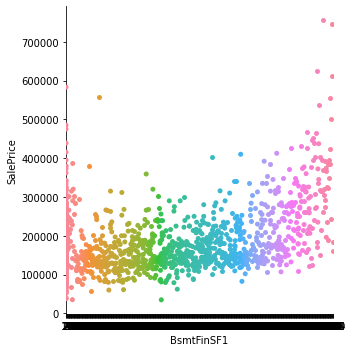

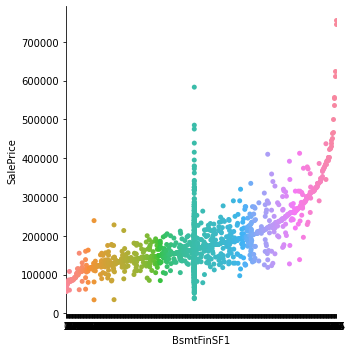

In [56]:
cat = values[13]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 15th Linear Value Found - TotalBsmtSF

TotalBsmtSF Correction


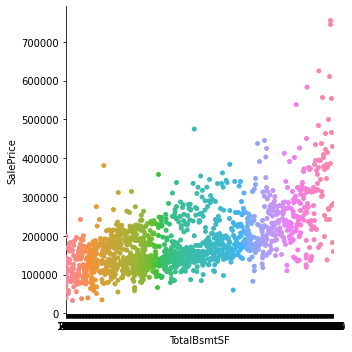

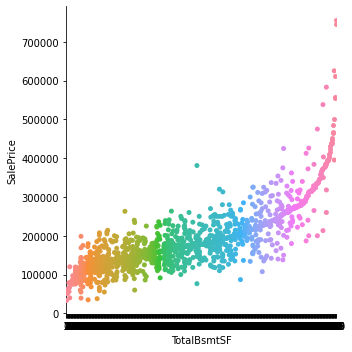

In [57]:
cat = values[14]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 16th Linear Value Found - 1stFlrSF

1stFlrSF Correction


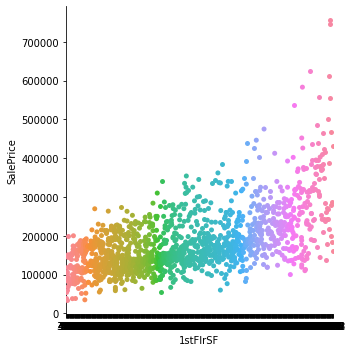

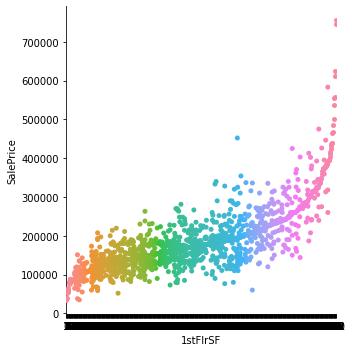

In [58]:
cat = values[15]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 17th Linear Value Found - 2ndFlrSF

2ndFlrSF Correction


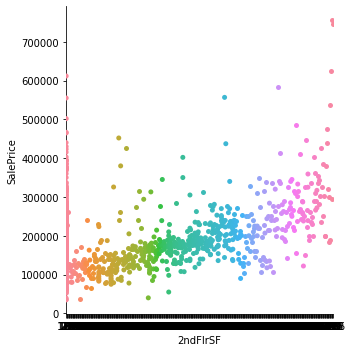

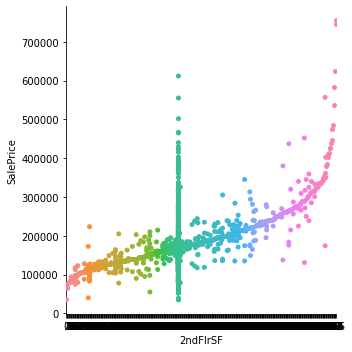

In [59]:
cat = values[16]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 18th Linear Value Found - GrLivArea

GrLivArea Correction


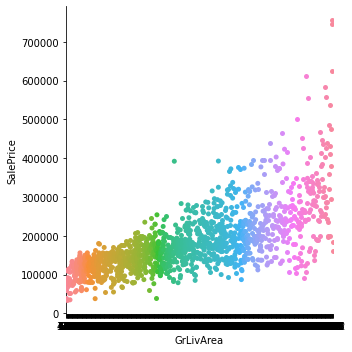

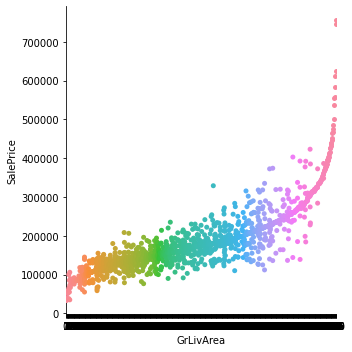

In [60]:
cat = values[17]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 19th Linear Value Found - FullBath Correction

FullBath Correction
(0, 2)


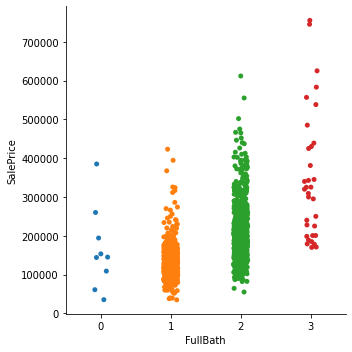

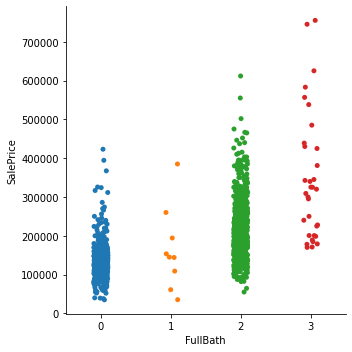

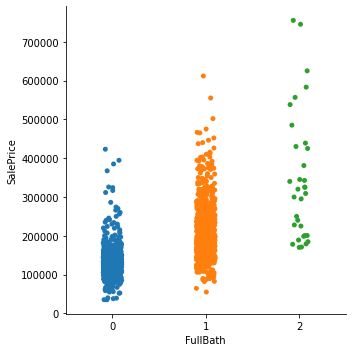

In [61]:
df2 = df_og.copy()

cat = values[18]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df2)


new_order_dic = find_order_dict(df2, cat)

df2[cat] = df2[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df2)


if True:

    
    new_order_dic2 = concatonate_dict_entry(new_order_dic, con_cat_array=[[0, 1, ], ], 
                                            high_low_array=['low', ])
    
    df[cat] = df[cat].map(new_order_dic2)


    sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 20th Linear Value Found - KitchenQual

KitchenQual Correction
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


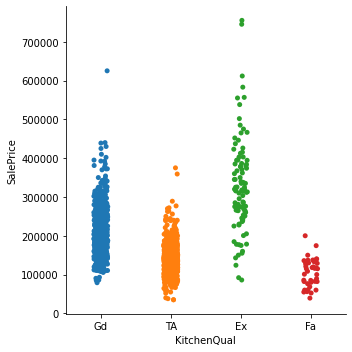

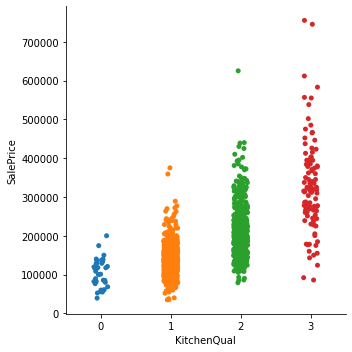

In [62]:
cat = values[19]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 21th Linear Value Found - TotRmsAbvGrd

TotRmsAbvGrd Correction
(0, 2)
(6, 8)
(9, 12)


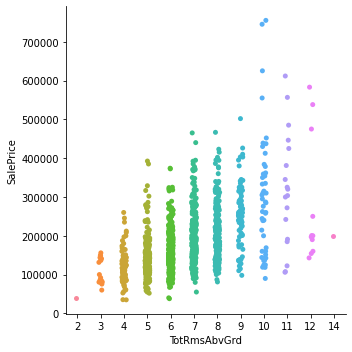

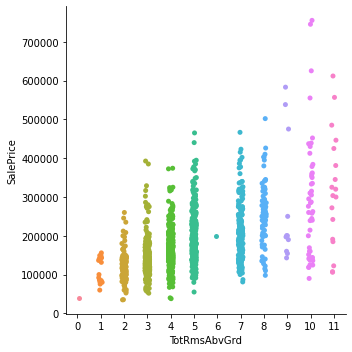

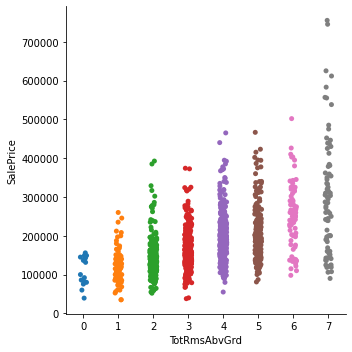

In [63]:

df2 = df_og.copy()

cat = values[20]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df2)


new_order_dic = find_order_dict(df2, cat)

df2[cat] = df2[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df2)


if True:
    
    
    new_order_dic2 = concatonate_dict_entry(new_order_dic, con_cat_array=[[0, 1,], [6, 7], [9, 10, 11] ], 
                                            high_low_array=['low', 'low', 'low' ])
    
    df[cat] = df[cat].map(new_order_dic2)


    sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 22th Linear Value Found - FirePlaces

Fireplaces Correction
(2, 4)


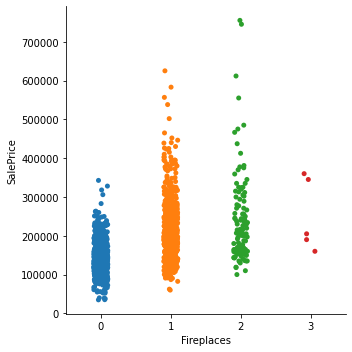

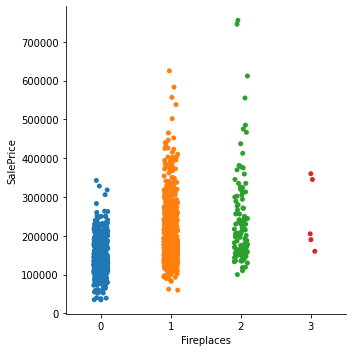

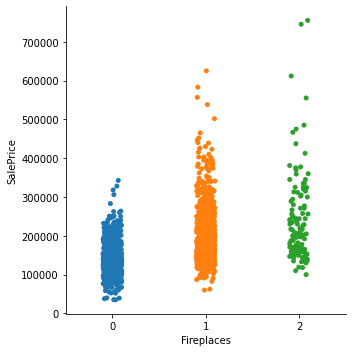

In [64]:
df2 = df_og.copy()

cat = values[21]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df2)


new_order_dic = find_order_dict(df2, cat)

df2[cat] = df2[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df2)

if True:
    
    new_order_dic2 = concatonate_dict_entry(new_order_dic, con_cat_array=[[2, 3, ], ], 
                                            high_low_array=['low', ])
    
    df[cat] = df[cat].map(new_order_dic2)


    sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 23th Linear Value Found - GarageYrBlt

GarageYrBlt Correction


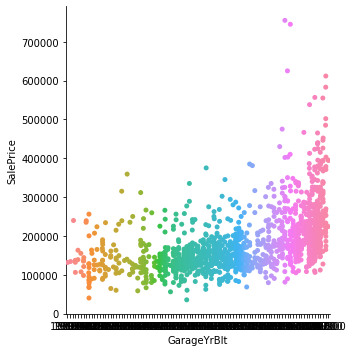

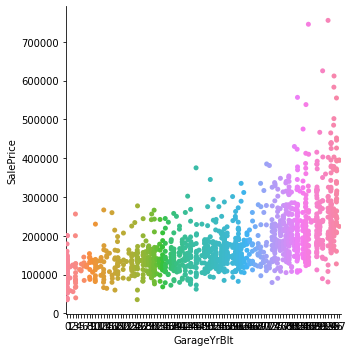

In [65]:


cat = values[22]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)




# Redefining The 24th Linear Value Found - GarageCars

GarageCars Correction
(2, 4)


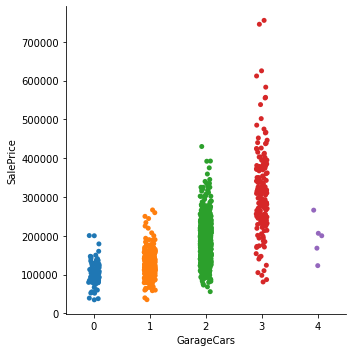

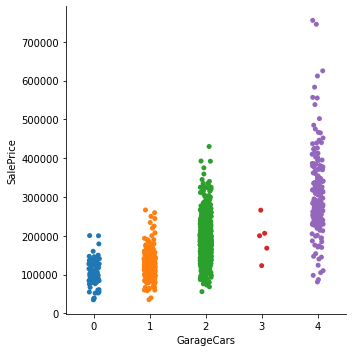

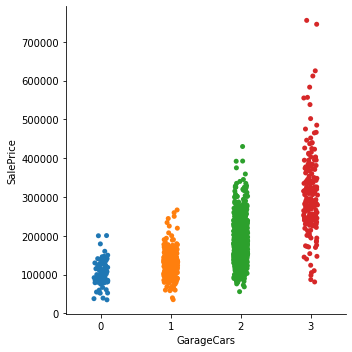

In [66]:
df2 = df_og.copy()

cat = values[23]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df2)


new_order_dic = find_order_dict(df2, cat)

df2[cat] = df2[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df2)

if True:
    
    new_order_dic2 = concatonate_dict_entry(new_order_dic, con_cat_array=[[2, 3], ], 
                                            high_low_array=['low', ])
    
    df[cat] = df[cat].map(new_order_dic2)


    sns.catplot(x=cat, y="SalePrice", data=df)

# Redefining The 25th Linear Value Found - GarageArea

GarageArea Correction


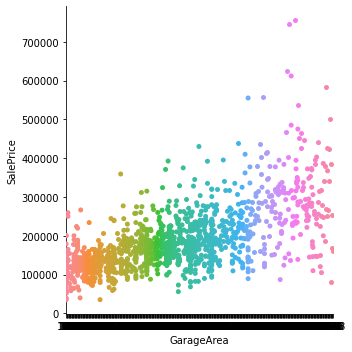

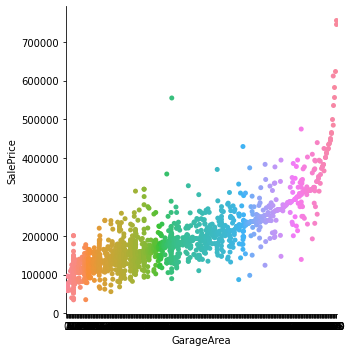

In [67]:


cat = values[24]
print(f'{cat} Correction')
sns.catplot(x=cat, y="SalePrice", data=df)


new_order_dic = find_order_dict(df, cat)

df[cat] = df[cat].map(new_order_dic)


sns.catplot(x=cat, y="SalePrice", data=df)

In [68]:
df.to_csv('./fixed_data3.csv')

In [63]:
df = pd.read_csv('./fixed_data2.csv')

In [58]:
remove_vars = [
'MasVnrArea',
'BsmtFinSF1',
'2ndFlrSF',
]

for var in remove_vars:
    df.pop(var)

In [69]:
# Imports
import sklearn
from sklearn import svm, preprocessing

In [70]:
# Shuffle the data
df = sklearn.utils.shuffle(df)

In [71]:
df.head()

,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1004,2,3,438,3,4,2,70,31,39,1,...,173,491,1,1,5,0,56,2,87,136905
1215,3,3,265,2,4,2,50,20,62,1,...,173,291,0,1,3,0,29,1,45,134500
233,2,1,68,0,5,2,44,7,6,1,...,36,51,0,1,2,1,51,1,37,94500
989,7,3,686,3,5,2,70,31,164,1,...,161,535,1,2,5,1,56,2,190,195000
308,4,1,41,0,5,3,13,1,62,1,...,10,38,0,0,3,0,0,0,12,89500


In [141]:
df = sklearn.utils.shuffle(df)

# Drop the SalePrice
x1 = df.drop('SalePrice', axis=1)
    

# Get those Values
X = x1.values

# Preprocess the input values
X = preprocessing.scale(X)

# Return the SalePrice
y = df['SalePrice'].values


# Seperate the Dataset
test_size = 120
X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]




from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))


if False:
    # Do a Science
    reg = sklearn.svm.SVR(kernel='linear', C=1000, epsilon=0.001, tol=0.0001)

    #reg = SGDRegressor(max_iter=100, l1_ratio=1, alpha=0.001, tol=0.001)

    reg.fit(X_train, y_train)

    print(reg.score(X_test, y_test))
    print('')

0.9777219091027806


In [21]:
X_train = df[['LotArea','GrLivArea', 'OverallQual', 'GarageCars', 'Fireplaces', 'MSZoning']][:-200]

#y_uncleaned = houses.SalePrice
y_train = df[['SalePrice']][:-200]


X_test = df[['LotArea', 'GrLivArea', 'OverallQual', 'GarageCars', 'Fireplaces', 'MSZoning']][-200:]

#y_uncleaned = houses.SalePrice
y_test = df[['SalePrice']][-200:]

In [23]:
reg = sklearn.svm.SVR(kernel='linear', C=600, epsilon=0.01, tol=0.0001)

In [24]:
reg.fit(X_train, y_train)

print(reg.score(X_test, y_test))
print('')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5649021327295707

